In [19]:
import pandas as pd
import glob, os, json
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# Import sleep data
json_dir = 'JSON Files/Sleep'

json_pattern = os.path.join(json_dir, 'sleep*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    dfs.append(json_data)
fitbit_df = pd.concat(dfs)

In [8]:
fitbit_df.isnull().sum(axis = 0)

logId                                         0
dateOfSleep                                   0
startTime                                     0
endTime                                       0
duration                                      0
minutesToFallAsleep                           0
minutesAsleep                                 0
minutesAwake                                  0
minutesAfterWakeup                            0
timeInBed                                     0
efficiency                                    0
type                                          0
infoCode                                      0
mainSleep                                     0
levels.summary.deep.count                     7
levels.summary.deep.minutes                   7
levels.summary.deep.thirtyDayAvgMinutes       7
levels.summary.wake.count                     7
levels.summary.wake.minutes                   7
levels.summary.wake.thirtyDayAvgMinutes       7
levels.summary.light.count              

In [14]:
# Add date, time, weekday
fitbit_df['wakeDate'] = pd.DatetimeIndex(fitbit_df['endTime']).date
fitbit_df['sleepDate'] = pd.DatetimeIndex(fitbit_df['startTime']).date
fitbit_df['wakeTime'] = pd.DatetimeIndex(fitbit_df['endTime']).time
fitbit_df['sleepTime'] = pd.DatetimeIndex(fitbit_df['startTime']).time
fitbit_df['Weekday'] = pd.DatetimeIndex(fitbit_df['endTime']).weekday
fitbit_df['hoursAsleep'] = (fitbit_df['minutesAsleep'] / 60)
fitbit_df

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,mainSleep,levels.summary.deep.count,levels.summary.deep.minutes,levels.summary.deep.thirtyDayAvgMinutes,levels.summary.wake.count,levels.summary.wake.minutes,levels.summary.wake.thirtyDayAvgMinutes,levels.summary.light.count,levels.summary.light.minutes,levels.summary.light.thirtyDayAvgMinutes,levels.summary.rem.count,levels.summary.rem.minutes,levels.summary.rem.thirtyDayAvgMinutes,levels.data,levels.shortData,levels.summary.restless.count,levels.summary.restless.minutes,levels.summary.awake.count,levels.summary.awake.minutes,levels.summary.asleep.count,levels.summary.asleep.minutes,site,Date,Time,Weekday,hoursAsleep,wakeTime,sleepTime,wakeDate,sleepDate
0,28995147282,2020-09-23,2020-09-22T22:56:00.000,2020-09-23T06:57:30.000,28860000,0,418,63,0,481,95,stages,0,True,3.0,16.0,57.0,36.0,63.0,59.0,31.0,305.0,272.0,10.0,97.0,91.0,"[{'dateTime': '2020-09-22T22:56:00.000', 'leve...","[{'dateTime': '2020-09-22T22:56:00.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-23,06:57:30,2,6.966667,06:57:30,22:56:00,2020-09-23,2020-09-22
1,28981497960,2020-09-22,2020-09-21T22:32:30.000,2020-09-22T06:57:30.000,30300000,0,443,62,0,505,97,stages,0,True,6.0,72.0,56.0,40.0,62.0,58.0,32.0,285.0,271.0,12.0,86.0,92.0,"[{'dateTime': '2020-09-21T22:32:30.000', 'leve...","[{'dateTime': '2020-09-21T22:54:00.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-22,06:57:30,1,7.383333,06:57:30,22:32:30,2020-09-22,2020-09-21
2,28962967510,2020-09-21,2020-09-20T22:29:30.000,2020-09-21T06:33:30.000,29040000,0,435,49,0,484,98,stages,0,True,2.0,43.0,57.0,32.0,49.0,59.0,31.0,301.0,270.0,6.0,91.0,92.0,"[{'dateTime': '2020-09-20T22:29:30.000', 'leve...","[{'dateTime': '2020-09-20T22:31:00.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-21,06:33:30,0,7.250000,06:33:30,22:29:30,2020-09-21,2020-09-20
3,28950593738,2020-09-20,2020-09-19T22:53:00.000,2020-09-20T06:44:00.000,28260000,0,407,64,0,471,92,stages,0,True,5.0,38.0,58.0,27.0,64.0,59.0,28.0,254.0,271.0,8.0,115.0,91.0,"[{'dateTime': '2020-09-19T22:53:00.000', 'leve...","[{'dateTime': '2020-09-19T22:53:30.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-20,06:44:00,6,6.783333,06:44:00,22:53:00,2020-09-20,2020-09-19
4,28937970674,2020-09-19,2020-09-18T22:45:00.000,2020-09-19T06:04:30.000,26340000,0,400,39,0,439,95,stages,0,True,4.0,49.0,58.0,30.0,39.0,59.0,21.0,211.0,273.0,14.0,140.0,88.0,"[{'dateTime': '2020-09-18T22:45:00.000', 'leve...","[{'dateTime': '2020-09-18T23:11:30.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-19,06:04:30,5,6.666667,06:04:30,22:45:00,2020-09-19,2020-09-18
5,28926491507,2020-09-18,2020-09-17T23:03:00.000,2020-09-18T06:53:00.000,28200000,0,419,51,0,470,98,stages,0,True,4.0,37.0,59.0,34.0,51.0,60.0,34.0,303.0,272.0,9.0,79.0,89.0,"[{'dateTime': '2020-09-17T23:03:00.000', 'leve...","[{'dateTime': '2020-09-17T23:48:30.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-18,06:53:00,4,6.983333,06:53:00,23:03:00,2020-09-18,2020-09-17
6,28910515393,2020-09-17,2020-09-16T22:40:00.000,2020-09-17T06:18:30.000,27480000,0,401,57,0,458,97,stages,0,True,4.0,70.0,59.0,29.0,57.0,60.0,26.0,239.0,274.0,10.0,92.0,88.0,"[{'dateTime': '2020-09-16T22:40:00.000', 'leve...","[{'dateTime': '2020-09-16T22:54:00.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-17,06:18:30,3,6.683333,06:18:30,22:40:00,2020-09-17,2020-09-16
7,28894897276,2020-09-16,2020-09-15T21:46:00.000,2020-09-16T06:14:30.000,30480000,0,451,57,0,508,94,stages,0,True,6.0,60.0,59.0,34.0,57.0,60.0,34.0,283.0,273.0,8.0,108.0,87.0,"[{'dateTime': '2020-09-15T21:46:00.000', 'leve...","[{'dateTime': '2020-09-15T21:50:00.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-16,06:14:30,2,7.516667,06:14:30,21:46

In [42]:
sleep_times_df = fitbit_df[['dateOfSleep', 'minutesAsleep', 'levels.summary.deep.minutes', 'levels.summary.wake.minutes', 'levels.summary.light.minutes']]
sleep_times_df = sleep_times_df.set_index('dateOfSleep')
sleep_times_df = sleep_times_df / 60
sleep_times_df = sleep_times_df.rename(columns={'minutesAsleep':'Hours Asleep', 'levels.summary.deep.minutes':'Deep Sleep', 'levels.summary.wake.minutes':'Awake', 'levels.summary.light.minutes':'Light Sleep'})
sleep_times_df

,Hours Asleep,Deep Sleep,Awake,Light Sleep
dateOfSleep,,,,
2020-09-23,6.966667,0.266667,1.050000,5.083333
2020-09-22,7.383333,1.200000,1.033333,4.750000
2020-09-21,7.250000,0.716667,0.816667,5.016667
2020-09-20,6.783333,0.633333,1.066667,4.233333
2020-09-19,6.666667,0.816667,0.650000,3.516667
2020-09-18,6.983333,0.616667,0.850000,5.050000
2020-09-17,6.683333,1.166667,0.950000,3.983333
2020-09-16,7.516667,1.000000,0.950000,4.716667
2020-09-15,7.550000,0.866667,1.033333,4.616667


In [43]:
# Import sleep score table
sleep_score_df = pd.read_csv('JSON Files/Sleep/sleep_score.csv')
sleep_score_df['Date'] = pd.DatetimeIndex(sleep_score_df['timestamp']).date
sleep_score_df['Time'] = pd.DatetimeIndex(sleep_score_df['timestamp']).time
sleep_score_df['Weekday'] = pd.DatetimeIndex(sleep_score_df['timestamp']).weekday
sleep_score_df.head()

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,Date,Time,Weekday
0,35497797079,2022-01-28T06:10:30Z,85,18,21,46,79,62,0.079249,2022-01-28,06:10:30,4
1,35479288194,2022-01-27T06:33:30Z,82,19,19,44,44,62,0.108007,2022-01-27,06:33:30,3
2,35464273333,2022-01-26T06:20:30Z,84,19,20,45,51,61,0.114169,2022-01-26,06:20:30,2
3,35451250023,2022-01-25T06:24:30Z,84,19,20,45,85,61,0.090155,2022-01-25,06:24:30,1
4,35435987736,2022-01-24T06:03:30Z,87,20,21,46,35,59,0.101917,2022-01-24,06:03:30,0


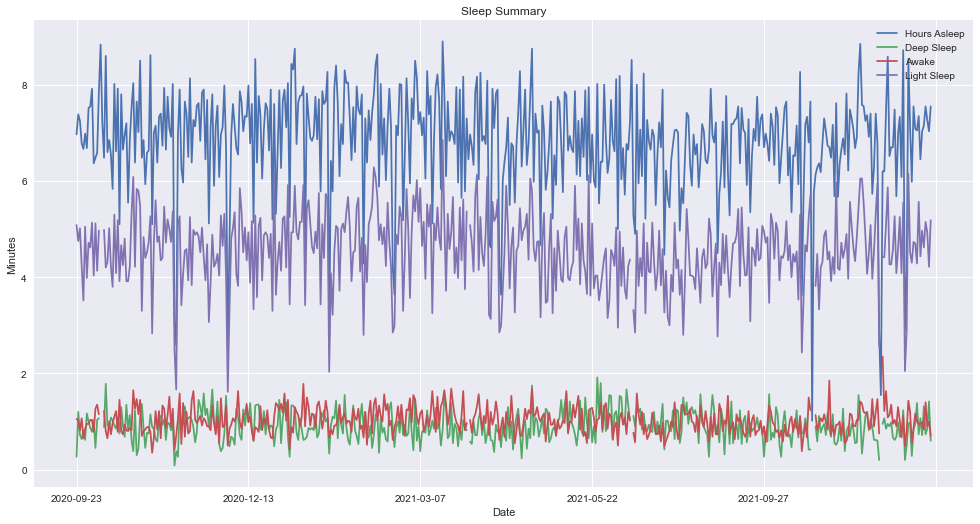

In [44]:
# Plot sleep and wake times
plt.style.use('seaborn')

sleep_times = sleep_times_df.plot(figsize=(15,8))
sleep_times.set_title("Sleep Summary")
sleep_times.set_xlabel("Date")
sleep_times.set_ylabel("Minutes")
plt.show()